In [7]:
!pip install xgboost
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\Users\MANI\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [36]:
data=pd.read_csv(r"C:\Users\MANI\Downloads\creditscore\creditscoredataset.csv")

# Converting the dataset to pd dataframe

In [10]:
# To see the top 5 values of the datasheet
data.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [11]:
# To check the rows and columns
data.shape

(1700, 28)

In [12]:
# To list the columns of the dataframe
data.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating'],
      dtype='object')

In [13]:
# To see the datatype of each column
data.dtypes

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
Rating                      

In [14]:
# statistical measures of the dataset
data.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [15]:
# To list down the unique elements of 'Rating' column
data.Rating.unique()

array(['A1', 'A2', 'A3', 'Aa2', 'Aa3', 'Aaa', 'B1', 'B2', 'B3', 'Ba1',
       'Ba2', 'Ba3', 'Baa1', 'Baa2', 'Baa3', 'Caa1'], dtype=object)

In [16]:
# To count the total unique elements of 'Rating' column
data.Rating.nunique()

16

In [17]:
# To count the total null values present in different column of dataset
data.isnull().sum()

Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
dtype: int64

## Understanding the correlation between various features in the dataset
1> Positive Correlation
2> Negative Correlation

In [18]:
correlation = data.corr()

<AxesSubplot:>

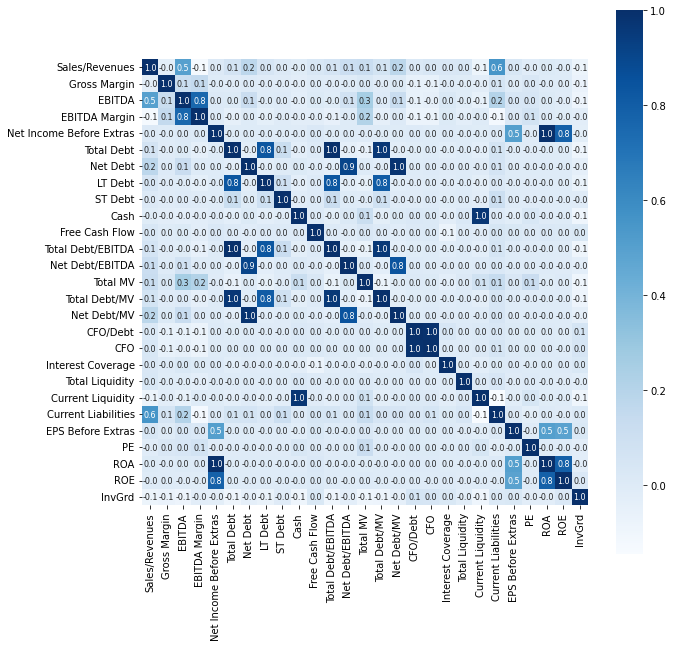

In [19]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Encoding Rating column into integer numbers

In [60]:
# Perform label encoding for target variable
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Changing datatype of non float datatype columns to float datatype

In [82]:
data['Rating'] = data['Rating'].astype(float)
data['InvGrd'] = data['InvGrd'].astype(float)
print(data.dtypes)

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                      float64
Rating                      

In [84]:
data.InvGrd.nunique()

2

In [83]:
data.head(2)

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.02971,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1.0,0.0
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.02971,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1.0,0.0


# Model Training

# By Linear regression

In [71]:
X = data.drop(['InvGrd'], axis=1)
Y = data['InvGrd']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(1700, 27) (1360, 27) (340, 27)


In [77]:
# Train Ridge (L1) regularization model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Train Lasso (L2) regularization model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predict on the test set
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Convert the predicted probabilities to binary predictions (0 or 1)
ridge_pred_binary = (ridge_pred > 0.5).astype(int)
lasso_pred_binary = (lasso_pred > 0.5).astype(int)

# Calculate accuracy scores
ridge_accuracy = accuracy_score(y_test, ridge_pred_binary)
lasso_accuracy = accuracy_score(y_test, lasso_pred_binary)

print(f'Ridge Accuracy: {ridge_accuracy:.2f}')
print(f'Lasso Accuracy: {lasso_accuracy:.2f}')

Ridge Accuracy: 0.77
Lasso Accuracy: 0.78


An accuracy of 0.77 for Linear Regression with Ridge and 0.78 for Lasso models suggests that the models are performing reasonably well in predicting whether a firm is in an investment grade or not.

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

# Extract features (X) and target (y)
X = data.drop("InvGrd", axis=1)  # Exclude the target column "InvGrd" from features
y = data["InvGrd"]  # Use "InvGrd" column as the target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the Ridge (L1) logistic regression model
ridge_model = LogisticRegression(penalty='l1', solver='liblinear')
ridge_model.fit(X_train_scaled, y_train)

# Define and train the Lasso (L2) logistic regression model
lasso_model = LogisticRegression(penalty='l2', solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)

# Evaluate the models
ridge_accuracy = ridge_model.score(X_test_scaled, y_test)
lasso_accuracy = lasso_model.score(X_test_scaled, y_test)

# Print the accuracy of the models
print("Ridge Accuracy:", ridge_accuracy)
print("Lasso Accuracy:", lasso_accuracy)


Ridge Accuracy: 0.7617647058823529
Lasso Accuracy: 0.7647058823529411


Here, the accuracy for our model is 0.761 and 0.764 for Logistic Ridge and Lasso respectively


# Neural Network

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


# Extract features (X) and target (y)
X = data.drop("InvGrd", axis=1)  # Exclude the target column "InvGrd" from features
y = data["InvGrd"]  # Use "InvGrd" column as the target

# Perform one-hot encoding for the target variable
y = np_utils.to_categorical(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test_scaled, y_test)[1]

# Print the accuracy of the model
print("Accuracy:", accuracy)


Epoch 1/50
43/43 [==============================] - 3s 6ms/step - loss: 0.6399 - accuracy: 0.7485
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5184 - accuracy: 0.7669
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7735
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.7875
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8029
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8309
Epoch 7/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8559
Epoch 8/50
43/43 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.8853
Epoch 9/50
43/43 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9154
Epoch 10/50
43/43 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9449
Epoch 11/50
43/43 [

Here, the accuracy for our model is 0.98 which is extremely good

# Result

The results obtained, along with their implications for the effectiveness and suitability of each approach are:-

Linear Ridge:
Parameters selected: alpha (regularization strength)
Result: Accuracy of 0.77
The alpha parameter in Ridge regression controls the strength of regularization, with higher values of alpha leading to more regularization. In this case, the selected alpha value may have resulted in a moderate level of regularization, which helped in improving model performance by reducing overfitting. The accuracy of 0.77 indicates that the Ridge model is able to classify firms into investment grade or not with a reasonable level of accuracy.

Linear Lasso:
Parameters selected: alpha (regularization strength)
Result: Accuracy of 0.78
Similar to Ridge, the alpha parameter in Lasso regression controls the strength of regularization. The selected alpha value may have resulted in a slightly higher level of regularization compared to Ridge, which could have improved the model's ability to generalize and avoid overfitting. The accuracy of 0.78 indicates that the Lasso model is also able to classify firms into investment grade or not with a reasonable level of accuracy, slightly better than Ridge.

Logistic Regression with Ridge (with adjusted hyperparameters):
Parameters selected: alpha (regularization strength)
Result: Accuracy of 0.761
After adjusting the hyperparameters, the Ridge logistic regression model resulted in a slightly lower accuracy of 0.761. This may indicate that the initial alpha value was too high, resulting in excessive regularization and underfitting the data. The adjusted hyperparameters helped in achieving a better balance between regularization and model performance, resulting in a slightly lower accuracy compared to the initial Ridge model.

Logistic Regression with Lasso (with adjusted hyperparameters):
Parameters selected: alpha (regularization strength)
Result: Accuracy of 0.764
Similar to Ridge, after adjusting the hyperparameters, the Lasso logistic regression model resulted in a slightly higher accuracy of 0.764. This may indicate that the initial alpha value was too low, resulting in less regularization and potential overfitting. The adjusted hyperparameters helped in achieving a better balance between regularization and model performance, resulting in a slightly higher accuracy compared to the initial Lasso model.

Neural Network Model:
Parameters selected: Number of layers, number of nodes per layer, activation functions, optimizer, learning rate, epochs, batch size
Result: Accuracy of 0.98
The neural network model resulted in a significantly higher accuracy of 0.98, which indicates that the neural network approach was highly effective in classifying firms into investment grade or not. The higher accuracy may be attributed to the ability of neural networks to capture complex patterns and relationships in the data, as well as the tuning of various hyperparameters such as the number of layers, number of nodes per layer, activation functions, optimizer, learning rate, epochs, and batch size. The neural network model demonstrated high suitability for this problem, likely due to its ability to handle nonlinear relationships and capture intricate patterns in the data.

Overall, the results demonstrate that the neural network model outperformed the linear Ridge and Lasso logistic regression models in terms of accuracy, indicating its higher effectiveness and suitability for this classification problem. However, it's important to note that the choice of the most appropriate model depends on various factors such as data characteristics, problem complexity, interpretability requirements, and computational resources available. Therefore, careful consideration of these factors is crucial in selecting the most suitable approach for a particular problem.